# Collaboration and Competition (Using the DDPG Algorithm)

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


Run the next code cell to install `progressbar`: a library to provide visual (text-based) progress to long running operations.

In [2]:
!pip -q install progressbar

Run the next code cell to install `torchviz`: a package to create visualizations of PyTorch execution graphs.

In [3]:
!pip -q install torchviz

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [4]:
# Load the shared hyperparameters.
from ddpg.hyperparams import *

In [5]:
import numpy as np
np.random.seed(RANDOM_SEED)

import random
random.seed(RANDOM_SEED)

import torch
torch.manual_seed(RANDOM_SEED)

In [6]:
# Import the progressbar package.
import progressbar as pb

# Other imports.
from collections import deque

In [7]:
from unityagents import UnityEnvironment

# Load the environment.
env = UnityEnvironment(seed=RANDOM_SEED, file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [8]:
# Get the default brain.
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [9]:
# Reset the environment.
env_info = env.reset(train_mode=True)[brain_name]

# Number of agents.
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# Size of each action.
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# Examine the state space.
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [10]:
for i in range(5):                                         # Play game for 5 episodes.
    env_info = env.reset(train_mode=False)[brain_name]     # Reset the environment.
    states = env_info.vector_observations                  # Get the current state (for each agent).
    scores = np.zeros(num_agents)                          # Initialize the score (for each agent).
    while True:
        actions = np.random.randn(num_agents, action_size) # Select an action (for each agent).
        actions = np.clip(actions, -1, 1)                  # All actions between -1 and 1.
        env_info = env.step(actions)[brain_name]           # Send all actions to tne environment.
        next_states = env_info.vector_observations         # Get next state (for each agent).
        rewards = env_info.rewards                         # Get reward (for each agent).
        dones = env_info.local_done                        # See if episode finished.
        scores += env_info.rewards                         # Update the score (for each agent).
        states = next_states                               # Roll over states to next time step.
        if np.any(dones):                                  # Exit loop if episode finished.
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [11]:
# Load the DDPG agent.
from ddpg.agent import Agent

In [12]:
ddpg = Agent(STATE_SIZE, ACTION_SIZE, NUM_AGENTS)

# Log the configuration/architecture.
ddpg.print_arch()

Actor (Local):
Actor(
  (fc1): Linear(in_features=24, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=2, bias=True)
)
Actor (Target):
Actor(
  (fc1): Linear(in_features=24, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=2, bias=True)
)
Critic (Local):
Critic(
  (fcs1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=514, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)
Critic (Target):
Critic(
  (fcs1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=514, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)


In [13]:
def train(agent, env, n_episodes=int(2e3), autosave_every=int(1e2)):
    """ Train agents currently running the environment,
        using a Deep Deterministic Policy Gradient (DDPG) algorithm wrapper.
    
    Params
    ======
        agent (DDPG): Instance of the DDPG wrapper class
        env (UnityEnvironment): Instance of the Unity environment for DDPG agent training
        n_episodes (int): Number of episodes to train an agent (or agents)
        autosave_every (int): Threshold (or frequency) for auto-saving model weights to disk
    """
    
    # Define the widgets used in a progress bar (useful for logging).
    widgets = [
        "EPISODE: ", pb.Counter(), '/', str(n_episodes), ' ',
        pb.Percentage(), ' ',
        pb.ETA(), ' ',
        pb.Bar(marker=pb.RotatingMarker()), ' ',
        'ROLLING AVG: ', pb.FormatLabel('')]
        
    # Define a progress bar timer.
    timer = pb.ProgressBar(widgets=widgets, maxval=n_episodes).start()
    
    # Define other "utility" variables.
    total_scores = []
    scores_deque = deque(maxlen=int(1e2))
    rolling_avgs = []
    highest_score = 0.
    solved = False
    
    for i_episode in range(1, n_episodes+1):
        
        # Record the current average score.
        current_avg = 0. if i_episode == 1 else rolling_avgs[-1]
        
        # Update the "ROLLING AVG" value.
        widgets[12] = pb.FormatLabel(str(current_avg)[:6])
        
        # Update the timer with the current values for this episode.
        timer.update(i_episode)
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations[:, -STATE_SIZE:]
        scores = np.zeros(NUM_AGENTS)
        agent.reset()
        
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations[:, -STATE_SIZE:]
            rewards = env_info.rewards
            dones = env_info.local_done
        
            agent.step(states, actions, rewards, next_states, dones)

            scores += rewards
            states = next_states

            if np.any(dones):
                break
                
        # Save the current maximum score.
        max_score = np.max(scores)

        scores_deque.append(max_score)
        total_scores.append(max_score)
        
        # Save the current average score.
        avg_score = np.mean(scores_deque)
        rolling_avgs.append(avg_score)
        
        # Keep track of the highest score in the game.
        if avg_score > highest_score:
            highest_score = avg_score
            if solved:
                agent.save() # Override the previously saved model because this one seems better.
        
        # Environment is considered solved (at this stage).
        if avg_score >= .5 and not solved:
            print('\nEnvironment solved in {:d} episodes.\tAverage score: {:.2f}'.format(
                i_episode, avg_score))
            solved = True
            agent.save()
            print("Model saved successfully")
            break
            
        if i_episode % autosave_every == 0 and not solved:
            agent.save()
            
    # Save the final model.
    agent.save()
                       
    # Return both total scores and rolling averages.
    return total_scores, rolling_avgs


# Train the DDPG agent.
total_scores, rolling_avgs = train(ddpg, env)


Environment solved in 1203 episodes.	Average score: 0.51


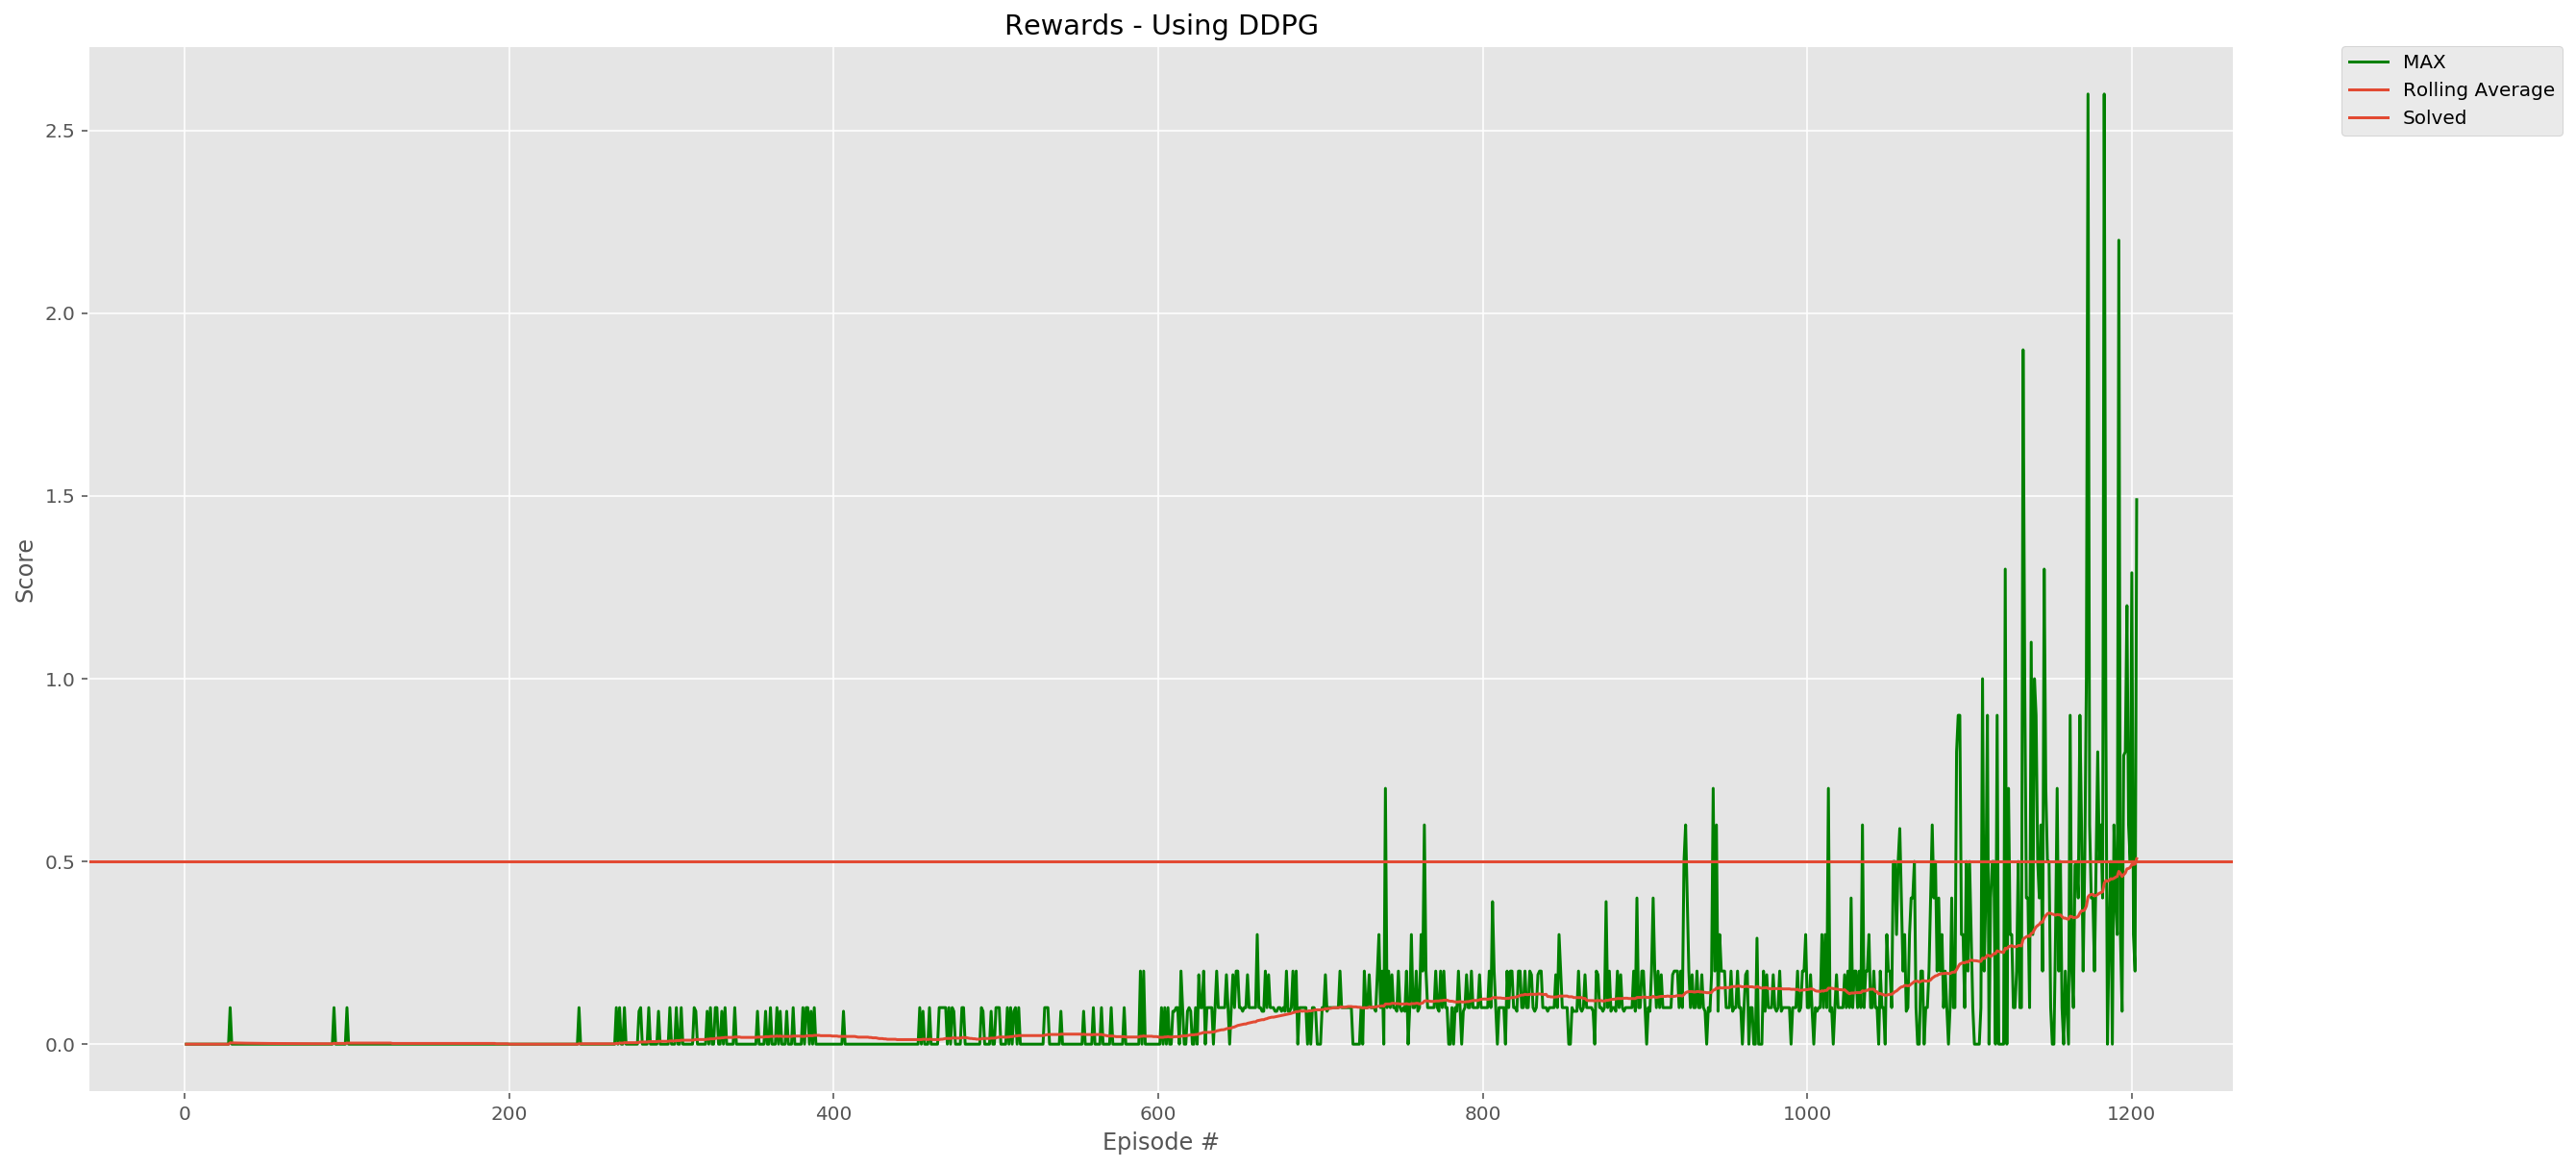

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# High-resolution plots for retina displays.
%config InlineBackend.figure_format = 'retina'

# Plot the scores using matplotlib.
plt.style.use('ggplot')

def plot(scores, rolling_avgs):
    """ Plot the resutls.
    """
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    plt.title('Rewards - Using DDPG')
    plt.plot(np.arange(1, len(scores)+1), scores, label="Maximum Score", color="g")
    plt.plot(np.arange(1, len(rolling_avgs)+1), rolling_avgs, label="Rolling Average")
    plt.axhline(y=0.5, linestyle="-", label="Solved (0.5)")
    # plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
    plt.legend(fontsize='xx-large', loc=2, borderaxespad=0.)
    plt.ylabel("Score")
    plt.xlabel("Episode #")
    
    # Reveal the plot.
    plt.show()
    

# Plot the results.
plot(total_scores, rolling_avgs)

In [15]:
# Code used after training.
# ddpg = Agent(STATE_SIZE, ACTION_SIZE, NUM_AGENTS)
# ddpg.load()

# Log the configuration/architecture.
# ddpg.print_arch()

def test(agent, env, num_games=11, load_from_file=True):
    """ Test agents in an environment,
        using a Deep Deterministic Policy Gradient (DDPG) algorithm wrapper.
    
    Params
    ======
        agent (DDPG): Instance of the DDPG wrapper class
        env (UnityEnvironment): Instance of the Unity environment for DDPG agent training
        num_games (int): Number of playable games in the environment
        load_from_file (bool): True for model loading (from file)
    """
    
    # Load from file.
    if load_from_file:
        agent.load()
        print("\rModel loaded successfully.", end="\n\n")
    
    print("Agent [0]: Red Racket.")
    print("Agent [1]: Blue Racket.", end="\n\n")

    game_scores = [0 for _ in range(NUM_AGENTS)]

    for i in range(1, num_games+1):
        env_info = env.reset(train_mode=False)[brain_name]   
        states = env_info.vector_observations
        scores = np.zeros(NUM_AGENTS)

        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            scores += rewards
            dones = env_info.local_done
            if np.any(dones):
                winner = np.argmax(scores)
                game_scores[winner] += 1
                print("\nPartial gameplay score: {}".format(game_scores))
                break

            states = next_states

    print("\n\rAgent #{} Won!".format(np.argmax(game_scores)))

In [16]:
# Test the DDPG agent.
test(ddpg, env, num_games=10)

Model loaded.

Agent #0: Red Racket.
Agent #1: Blue Racket.

Partial game score: [1, 0]
Partial game score: [1, 1]
Partial game score: [1, 2]
Partial game score: [1, 3]
Partial game score: [1, 4]
Partial game score: [2, 4]
Partial game score: [2, 5]
Partial game score: [3, 5]
Partial game score: [4, 5]
Partial game score: [4, 6]

Agent #1 Won!


When finished, you can close the environment.

In [17]:
env.close()